In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
df= pd.read_csv('AppleCompanyStock.csv')
df

,year,month,open,high,low,close,volume
0,2018,3,177.32,177.470,173.66,175.82,46812368
1,2018,3,180.29,183.500,177.62,178.02,151720299
2,2018,3,175.21,180.000,174.27,179.98,138442235
3,2018,3,176.35,180.615,172.45,176.21,196432091
4,2018,2,172.05,175.650,171.01,175.50,133197874
...,...,...,...,...,...,...,...
945,2000,2,108.00,117.120,105.94,108.75,14859900
946,2000,2,101.00,110.000,94.50,108.00,21289500
947,2000,1,108.44,114.190,100.62,101.62,18470300
948,2000,1,101.00,121.500,100.44,111.31,30213200


In [3]:
df = df[['year','month','close','volume']]

In [4]:
df = df.groupby(['year','month']).tail(1)
df

,year,month,close,volume
3,2018,3,176.21,196432091
7,2018,2,160.50,248091289
11,2018,1,175.00,99095223
16,2017,12,171.05,166555527
20,2017,11,172.50,203892677
...,...,...,...,...
933,2000,5,113.12,14607300
937,2000,4,131.75,17398400
942,2000,3,128.00,21508200
946,2000,2,108.00,21289500


In [5]:
df = df.sort_values(by=['year','month'], ascending=True).reset_index()
df.drop('index', axis=1, inplace=True)
df

,year,month,close,volume
0,2000,1,100.44,29872700
1,2000,2,108.00,21289500
2,2000,3,128.00,21508200
3,2000,4,131.75,17398400
4,2000,5,113.12,14607300
...,...,...,...,...
214,2017,11,172.50,203892677
215,2017,12,171.05,166555527
216,2018,1,175.00,99095223
217,2018,2,160.50,248091289


In [6]:
df['yrmo'] = df['year'].map(str)+df['month'].map(str)
df

,year,month,close,volume,yrmo
0,2000,1,100.44,29872700,20001
1,2000,2,108.00,21289500,20002
2,2000,3,128.00,21508200,20003
3,2000,4,131.75,17398400,20004
4,2000,5,113.12,14607300,20005
...,...,...,...,...,...
214,2017,11,172.50,203892677,201711
215,2017,12,171.05,166555527,201712
216,2018,1,175.00,99095223,20181
217,2018,2,160.50,248091289,20182


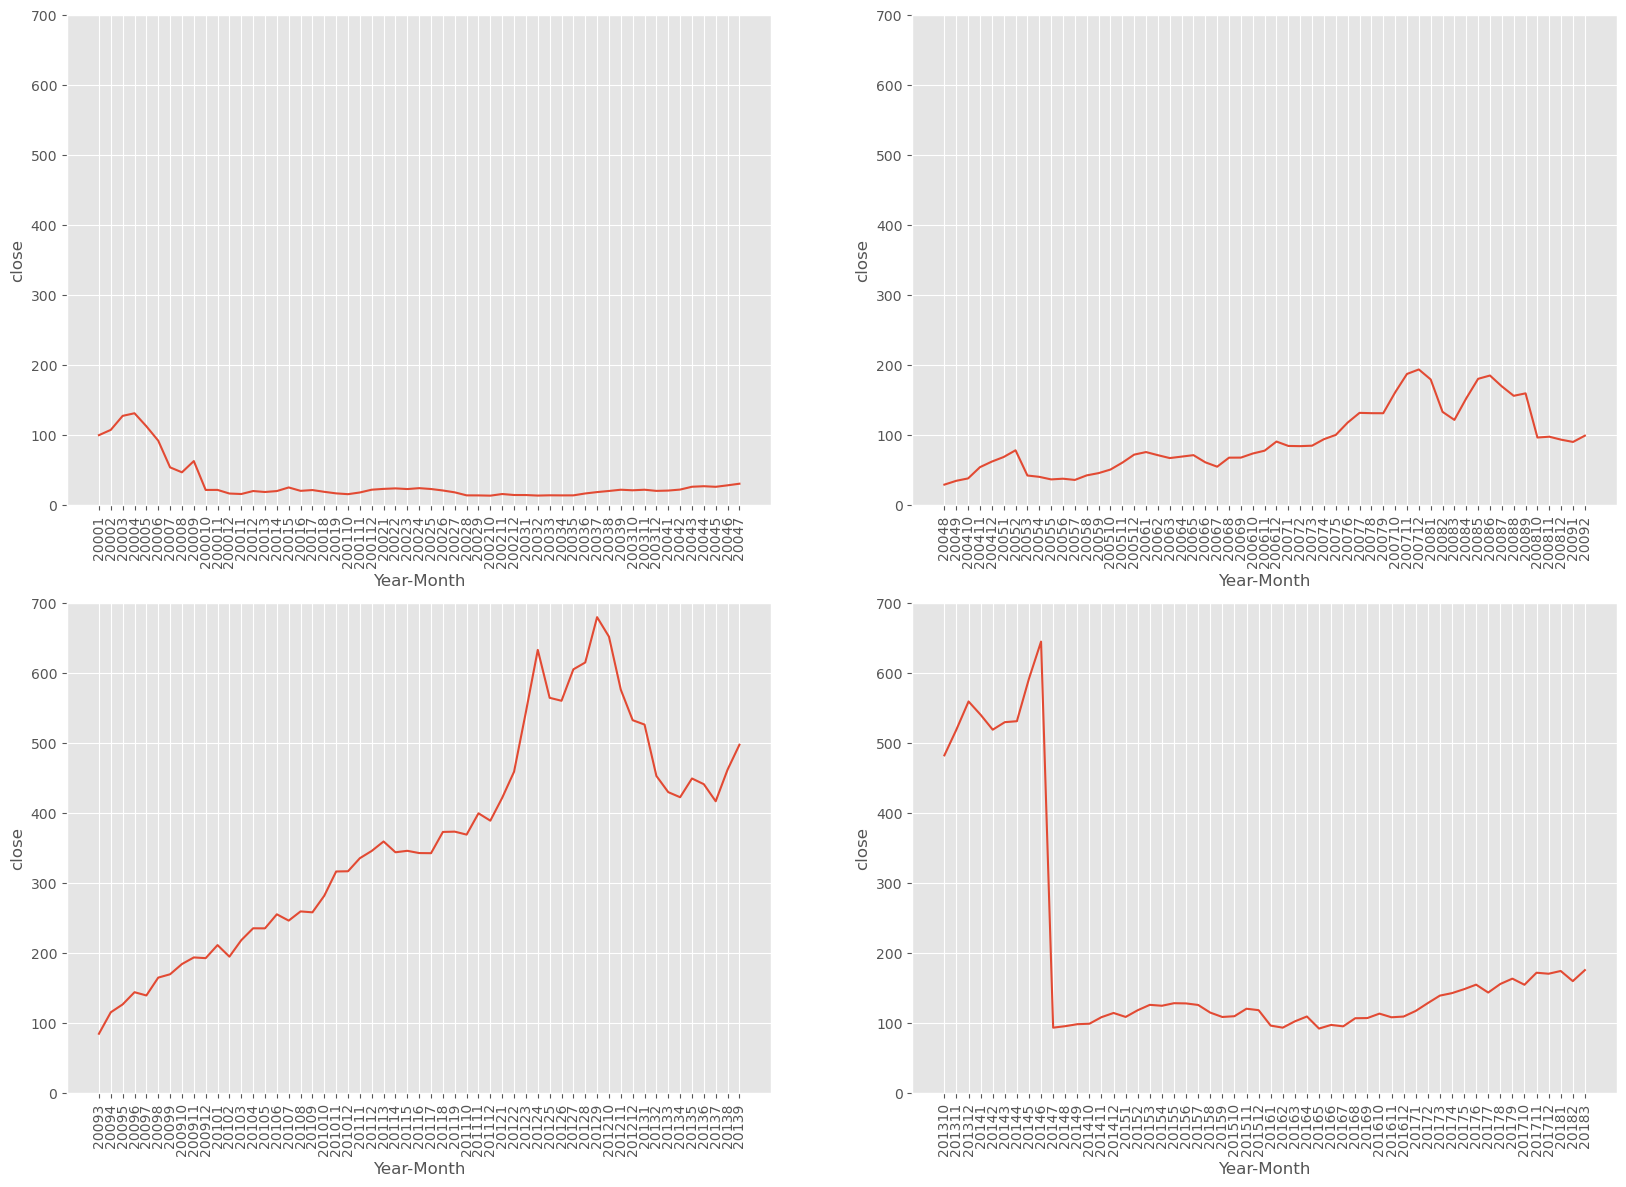

In [7]:
def get_scatterplot(data, yvar, ylim):
    fig = plt.figure(figsize=(20,14))
    for i,p in zip(range(4), range(0,220,55)):
        plt.subplot(221+i)
        plt.xticks(rotation=90)
        ax = sns.lineplot(x='yrmo', y=yvar, data=df[p:p+55], sort=False)
        plt.xlabel('Year-Month')
        ax.set_ylim(ylim)
get_scatterplot(df, 'close', [0,700])

In [8]:
# Split adjusted stock price:

In [9]:
june2014 = df.index[(df['year'] == 2014) & (df['month'] == 6)].tolist()[0]
june2014

173

In [10]:
sad = df.iloc[:june2014+1]['close'] / 7
sad

0      14.348571
1      15.428571
2      18.285714
3      18.821429
4      16.160000
         ...    
169    74.240000
170    75.777143
171    75.974286
172    84.654286
173    92.224286
Name: close, Length: 174, dtype: float64

In [11]:
sad = pd.concat([sad, df.iloc[june2014+1:]['close']])

In [12]:
df['close'] = sad

In [13]:
df[(df['year']<=2014)].tail(10)

,year,month,close,volume,yrmo
170,2014,3,75.777143,39435800,20143
171,2014,4,75.974286,35265900,20144
172,2014,5,84.654286,67823800,20145
173,2014,6,92.224286,58974500,20146
174,2014,7,94.030000,139168800,20147
175,2014,8,96.130000,236825000,20148
176,2014,9,98.970000,322672500,20149
177,2014,10,99.620000,247749150,201410
178,2014,11,109.010000,199952812,201411
179,2014,12,115.000000,266701088,201412


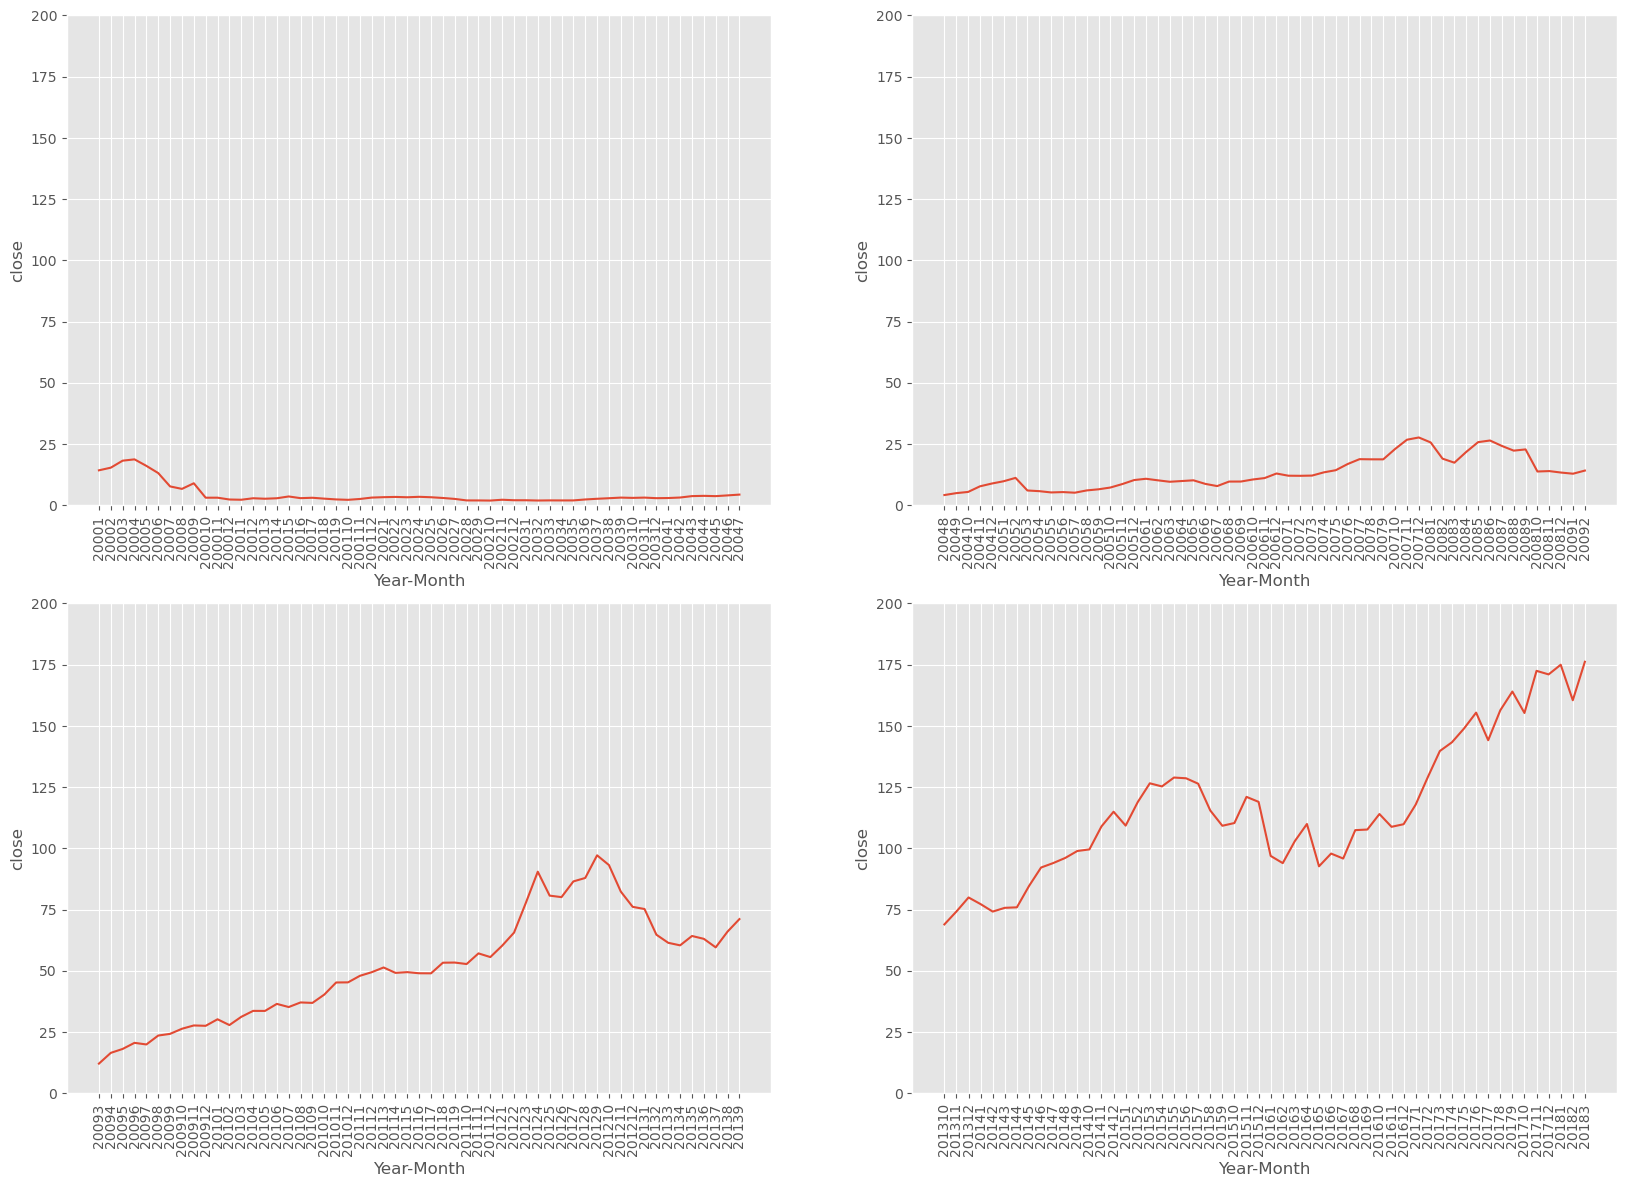

In [14]:
get_scatterplot(df,'close',[0,200])

In [15]:
# split adjusted volume:
sav = df.iloc[0:june2014]['volume']*7
sav = pd.concat([sav, df.iloc[june2014+1:len(df)]['volume']])

In [16]:
df['volume'] = sav

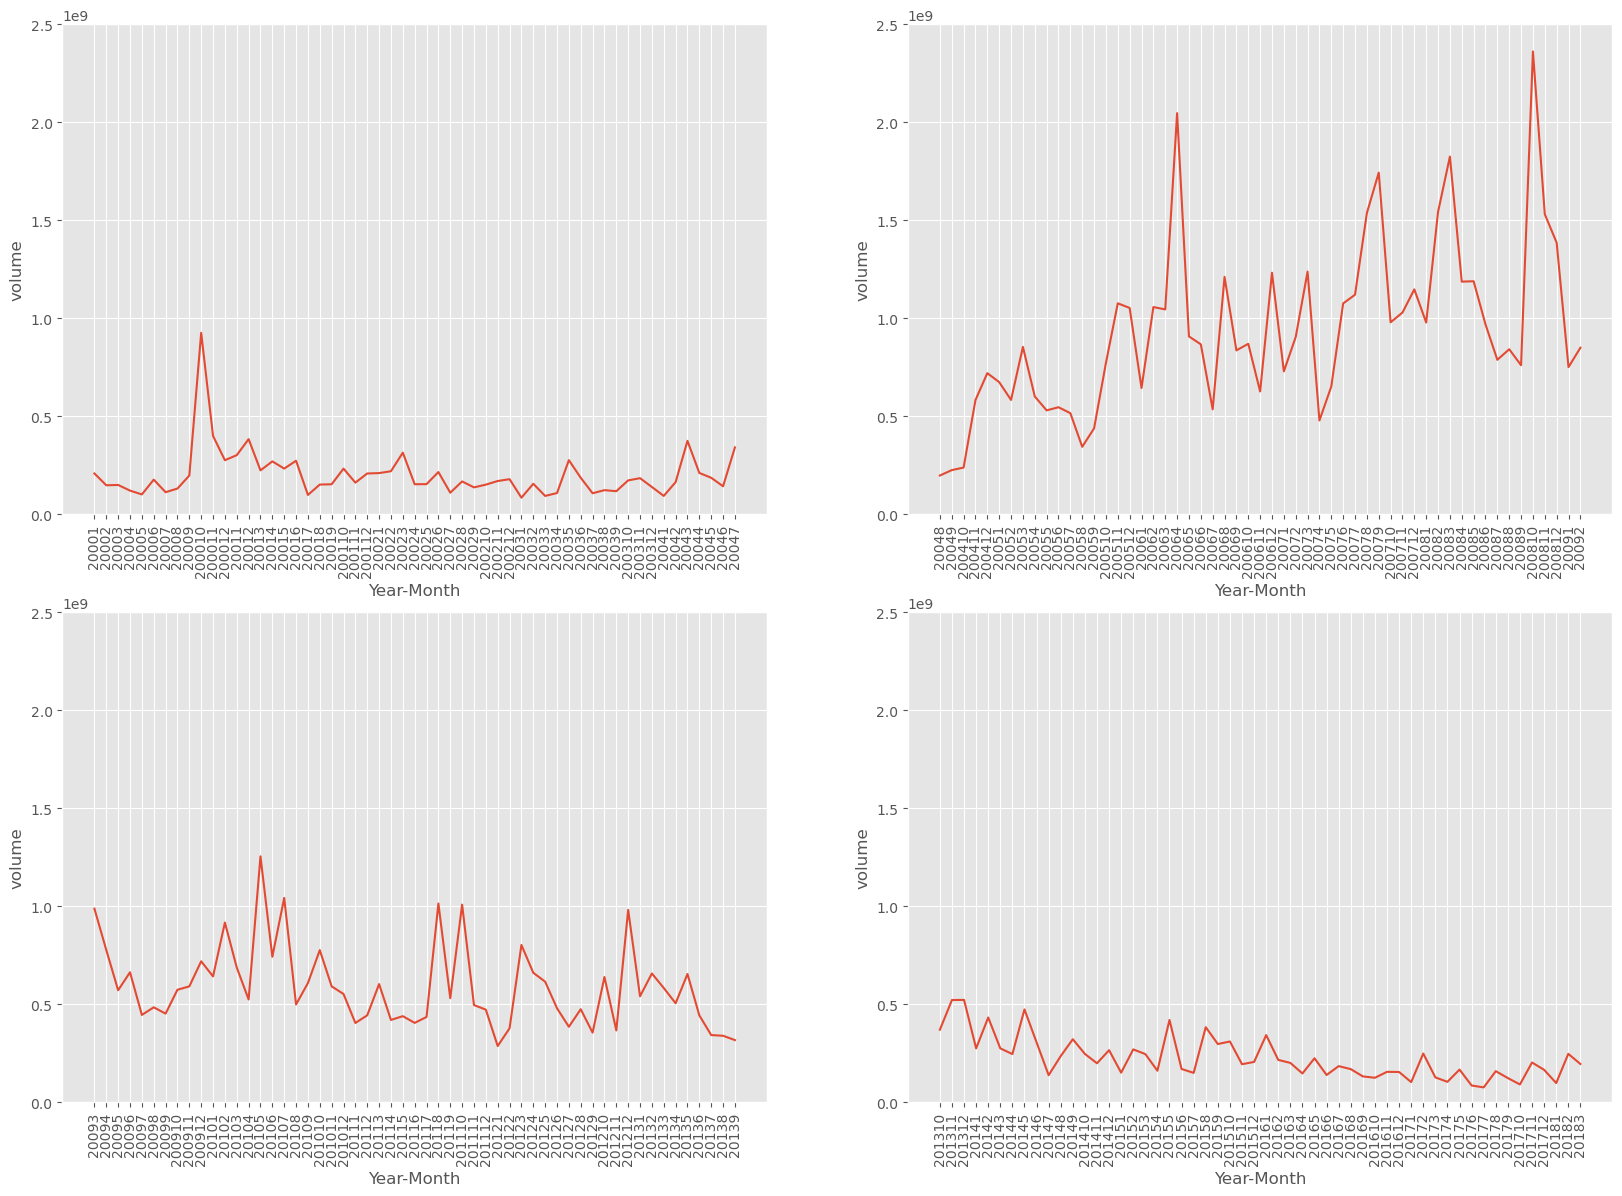

In [17]:
get_scatterplot(df,'volume',[0,2500000000])

<Axes: >

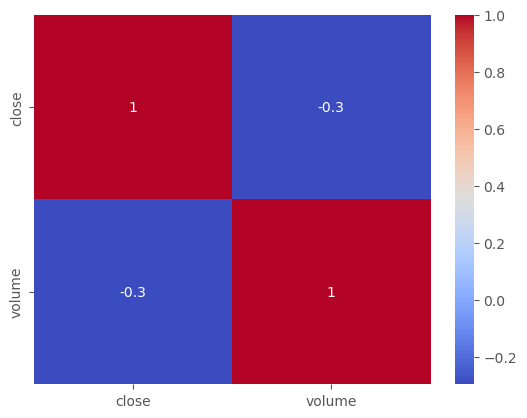

In [18]:
df_corr = df[['close','volume']].corr()
sns.heatmap(df_corr, annot=True,cmap = 'coolwarm')

In [19]:
# lags, moving averages and RSI based features:


In [20]:
for i in range (1,7):
    df['close_lag'+str(i)] = df['close'].shift(i)

In [21]:
import talib

In [54]:
for n in [3,6,9,12]:
    df['ma_' + str(n)] = talib.SMA(df['close'].values, timeperiod=n)/ df['close']
    df['rsi_' + str(n)] = talib.RSI(df['close'].values, timeperiod=n)

df

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
0,2000,1,14.348571,209108900.0,20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500.0,20002,14.348571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400.0,20003,15.428571,14.348571,NaN,NaN,NaN,NaN,0.876146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800.0,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN,0.930424,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,5,16.160000,102251100.0,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN,1.098745,52.839423,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2017,11,172.500000,203892677.0,201711,155.300000,164.050000,156.390000,144.180000,155.45,148.96,0.950435,76.689481,0.915816,74.682184,0.888857,72.888424,0.839053,71.164933
215,2017,12,171.050000,166555527.0,201712,172.500000,155.300000,164.050000,156.390000,144.18,155.45,0.972133,72.181771,0.938780,72.513950,0.916704,71.423542,0.875957,70.050916
216,2018,1,175.000000,99095223.0,20181,171.050000,172.500000,155.300000,164.050000,156.39,144.18,0.987714,77.569237,0.946943,74.896459,0.916114,73.081511,0.883371,71.382226
217,2018,2,160.500000,248091289.0,20182,175.000000,171.050000,172.500000,155.300000,164.05,156.39,1.052025,37.538474,1.036760,54.200771,1.006867,58.955598,0.979491,60.595373


<Axes: >

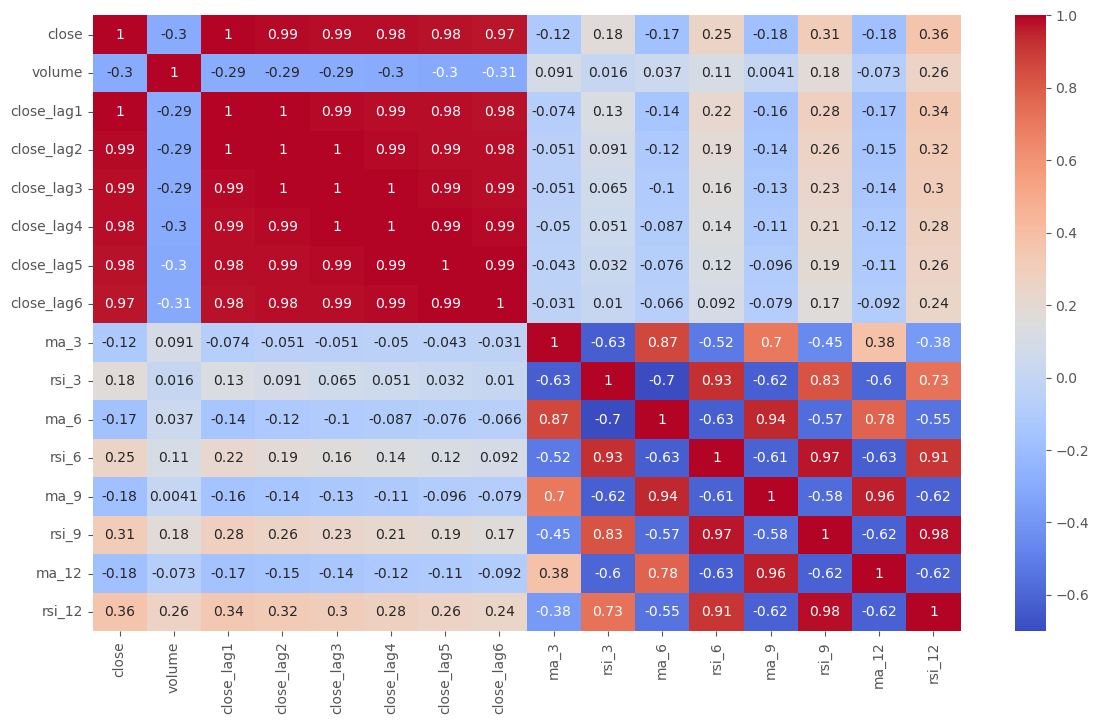

In [56]:
plt.figure(figsize = (14,8))
corr = df.drop(columns = ['year','month','yrmo']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [58]:
df.isna().sum()

year           0
month          0
close          0
volume         1
yrmo           0
close_lag1     1
close_lag2     2
close_lag3     3
close_lag4     4
close_lag5     5
close_lag6     6
ma_3           2
rsi_3          3
ma_6           5
rsi_6          6
ma_9           8
rsi_9          9
ma_12         11
rsi_12        12
dtype: int64

In [60]:
df.dropna(inplace=True)
len(df)

206

In [62]:
df.isna().sum()

year          0
month         0
close         0
volume        0
yrmo          0
close_lag1    0
close_lag2    0
close_lag3    0
close_lag4    0
close_lag5    0
close_lag6    0
ma_3          0
rsi_3         0
ma_6          0
rsi_6         0
ma_9          0
rsi_9         0
ma_12         0
rsi_12        0
dtype: int64

In [64]:
# Calculate IQR
q1 = df[['close','volume']].quantile(0.25)
q3 = df[['close','volume']].quantile(0.75)
iqr = q3-q1
iqr

close     7.573071e+01
volume    4.770292e+08
dtype: float64

<Axes: ylabel='close'>

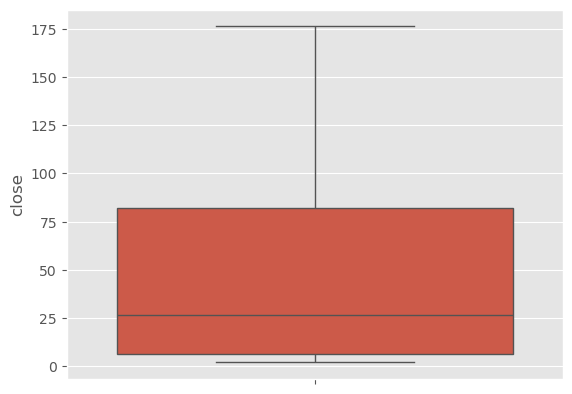

In [70]:
sns.boxplot(data = df['close'])

In [89]:
# check for outliers:
len(df[df['close']>q3['close']+1.5*iqr.iloc[0]]) * 100/len(df)


0.0

In [91]:
len(df[df['close']<q3['close']-1.5*iqr.iloc[0]]) * 100/len(df)

0.0

<Axes: ylabel='volume'>

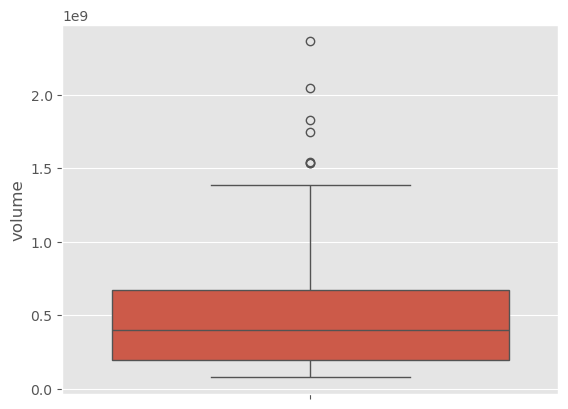

In [95]:
sns.boxplot(df['volume'])

In [103]:
len(df[df['volume']>q3['volume']+1.5*iqr.iloc[1]]) * 100/len(df)


0.0

In [109]:
df = df[df['volume']< df['volume'].quantile(0.95)]

<Axes: ylabel='volume'>

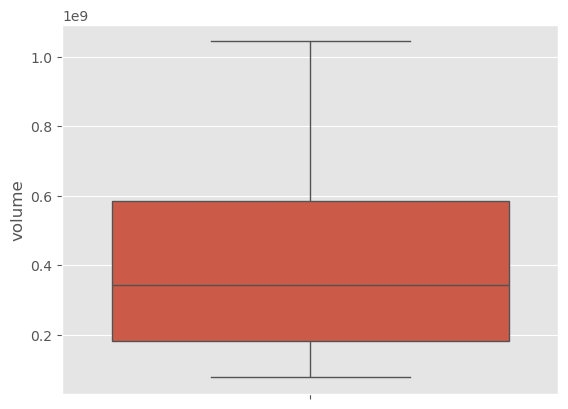

In [111]:
sns.boxplot(df['volume'])

In [167]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [169]:
import requests, bs4

In [207]:
headers = {'User-Agent': 'Mozilla/5.0'}
req = requests.get('https://en.wikipedia.org/wiki/List_of_Apple_Inc._media_events')
soup = bs4.BeautifulSoup(req.text, 'html.parser')
spans = soup.find_all('span', attrs={'class':'toctext'})
for span in spans[0:5]:
    print(span.text)
spans

[]

In [195]:
import calendar
months = list(calendar.month_name)[1:]

In [197]:
events = []
for span in spans:
    stxt = span.text
    for i, month in enumerate(months):
        if month in stxt:
            yr = stxt[-5:-1]
            events.append(yr+str(i+1))
events

[]

In [ ]:
from sklearn.model_selection import train_test_split

In [217]:
df_final = df.drop(['year','month','yrmo'], axis=1)
df_final

,close,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
12,2.338571,302642200.0,2.437143,3.178571,3.170000,9.062857,6.768571,7.777143,1.133781,15.092585,1.921095,24.078293,3.046291,26.265370,4.156791,26.507573
13,2.945714,384461700.0,2.338571,2.437143,3.178571,3.170000,9.062857,6.768571,0.873747,31.511451,1.308843,28.859313,1.919981,28.943696,2.946896,28.363782
14,2.750000,224981400.0,2.945714,2.338571,2.437143,3.178571,3.170000,9.062857,0.973853,28.817006,1.019394,28.173033,1.633478,28.567385,2.685844,28.114077
15,2.941429,270841900.0,2.750000,2.945714,2.338571,2.437143,3.178571,3.170000,0.978792,36.751619,0.940100,30.123383,1.344504,29.574912,2.061154,28.783068
16,3.678571,234143700.0,2.941429,2.750000,2.945714,2.338571,2.437143,3.178571,0.849061,61.524273,0.774369,37.913568,0.981748,33.630256,1.365372,31.462473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,172.500000,203892677.0,155.300000,164.050000,156.390000,144.180000,155.450000,148.960000,0.950435,76.689481,0.915816,74.682184,0.888857,72.888424,0.839053,71.164933
215,171.050000,166555527.0,172.500000,155.300000,164.050000,156.390000,144.180000,155.450000,0.972133,72.181771,0.938780,72.513950,0.916704,71.423542,0.875957,70.050916
216,175.000000,99095223.0,171.050000,172.500000,155.300000,164.050000,156.390000,144.180000,0.987714,77.569237,0.946943,74.896459,0.916114,73.081511,0.883371,71.382226
217,160.500000,248091289.0,175.000000,171.050000,172.500000,155.300000,164.050000,156.390000,1.052025,37.538474,1.036760,54.200771,1.006867,58.955598,0.979491,60.595373


In [225]:
df_n = df_final.loc[:, df_final.columns!= 'close']
df_n = (df_n - df_n.mean())/df_n.std()
df_m = pd.concat([df_n, df_final.loc[:,'close']], axis=1)
df_m

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,close
12,-0.400595,-0.985515,-0.963994,-0.959504,-0.831989,-0.879621,-0.854270,1.806247,-1.817828,6.063600,-1.841137,8.412658,-1.887466,8.558864,-1.915274,2.338571
13,-0.087244,-0.987525,-0.979268,-0.959325,-0.957381,-0.829871,-0.876460,-1.358515,-1.206533,2.151147,-1.611696,3.843815,-1.740971,5.297259,-1.806422,2.945714
14,-0.698019,-0.975148,-0.981299,-0.974841,-0.957199,-0.957653,-0.825983,-0.140173,-1.306851,0.301497,-1.644630,2.681625,-1.761554,4.593521,-1.821065,2.750000
15,-0.522383,-0.979138,-0.968791,-0.976904,-0.972976,-0.957467,-0.955633,-0.080056,-1.011435,-0.205209,-1.551033,1.509411,-1.706446,2.909497,-1.781834,2.941429
16,-0.662929,-0.975236,-0.972823,-0.964198,-0.975073,-0.973545,-0.955445,-1.658953,-0.089118,-1.264275,-1.177182,0.037901,-1.484633,1.033824,-1.624708,3.678571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.778784,2.130583,2.350261,2.247005,2.043136,2.344420,2.251934,-0.425183,0.475502,-0.360390,0.587343,-0.338908,0.662650,-0.385014,0.703530,172.500000
215,-0.921777,2.481203,2.169994,2.407310,2.302949,2.100039,2.394723,-0.161105,0.307674,-0.213646,0.483290,-0.225946,0.582526,-0.285528,0.638201,171.050000
216,-1.180135,2.451645,2.524347,2.224194,2.465944,2.364803,2.146768,0.028529,0.508257,-0.161484,0.597626,-0.228338,0.673211,-0.265542,0.716272,175.000000
217,-0.609513,2.532166,2.494474,2.584147,2.279755,2.530904,2.415404,0.811226,-0.982139,0.412471,-0.395560,0.139799,-0.099426,-0.006424,0.083708,160.500000


In [227]:
X = df_m.loc[:, df_m.columns!='close']
y = df_m['close']

In [ ]:
X_train,X_test, y_train,t_test = train_test_split(X,y, random_state=42, test_size=0.2)